# Validación Cruzada


Referencias:
1. https://scikit-learn.org/stable/modules/cross_validation.html
2. https://en.wikipedia.org/wiki/Cross-validation_(statistics)

In [ ]:
# Import scikit-learn libraries
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.datasets import load_iris, load_boston
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# import libraries for charting and manipulations with datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

In [ ]:
# crear un arreglo desde 1 a 30 para demostrar como se producen los split
rn = [i for i in range(1,31)]
rn

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [ ]:
# creamos 2 split con 3 y 5 particiones
# kfold entrega indices de los datos de entrenamiento y test
kf3 = KFold(n_splits=3, shuffle=False)
kf5 = KFold(n_splits=5, shuffle=False)

for train_index, test_index in kf3.split(rn):
    print(train_index, test_index)

print('-'*10 + '>')

for train_index, test_index in kf5.split(rn):
    print(train_index, test_index)

  

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29] [0 1 2 3 4 5 6 7 8 9]
[ 0  1  2  3  4  5  6  7  8  9 20 21 22 23 24 25 26 27 28 29] [10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [20 21 22 23 24 25 26 27 28 29]
---------->
[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29] [0 1 2 3 4 5]
[ 0  1  2  3  4  5 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29] [ 6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 18 19 20 21 22 23 24 25 26 27 28 29] [12 13 14 15 16 17]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 24 25 26 27 28 29] [18 19 20 21 22 23]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] [24 25 26 27 28 29]


In [ ]:
# Grafiquemos estas particiones

def kfoldize(kf, rn, shift=.1):
    train = pd.DataFrame()
    test = pd.DataFrame()
    i = 1
    for train_index, test_index in kf.split(rn):
        train_df = pd.DataFrame(np.take(rn, train_index), columns=["x"])
        train_df["val"] = i - shift
        train = train.append(train_df)

        test_df = pd.DataFrame(np.take(rn, test_index), columns=["x"])
        test_df["val"] = i + shift
        test = test.append(test_df)
        i += 1
    return train, test

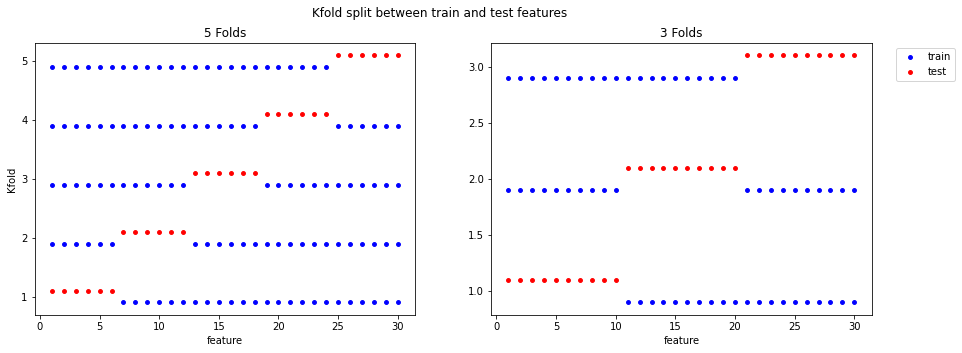

In [ ]:
train5, test5 = kfoldize(kf5,rn)
train3, test3 = kfoldize(kf3,rn)

fig,ax = plt.subplots(1,2, figsize=(15,5))
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train5)
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test5)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train3)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test3)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[1].set_xlabel("feature")
ax[0].set_title("5 Folds")
ax[1].set_title("3 Folds")
plt.suptitle("Kfold split between train and test features")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [ ]:
def kfold_stats(df, name):
    s =  pd.Series({"Min value: ": df["x"].min(),
              "Max value: ": df["x"].max(),
              "Min occurance: ": df["x"].value_counts().min(),
              "Max occurance: ": df["x"].value_counts().max(),
               "Min lenght": df.groupby("val").count().min().values[0],
               "Max lenght": df.groupby("val").count().max().values[0]})
    s.name = name
    return s
pd.concat([kfold_stats(train5, "Train5"), kfold_stats(test5,"Test5"),
          kfold_stats(train3, "Train3"), kfold_stats(test3,"Test3")], 
          axis=1)

,Train5,Test5,Train3,Test3
Min value:,1,1,1,1
Max value:,30,30,30,30
Min occurance:,4,1,2,1
Max occurance:,4,1,2,1
Min lenght,24,6,20,10
Max lenght,24,6,20,10


# Shuffled K Fold

In [ ]:
kf42 = KFold(n_splits=5, shuffle=True, random_state=42)
kf123 = KFold(n_splits=5, shuffle=True, random_state=123)


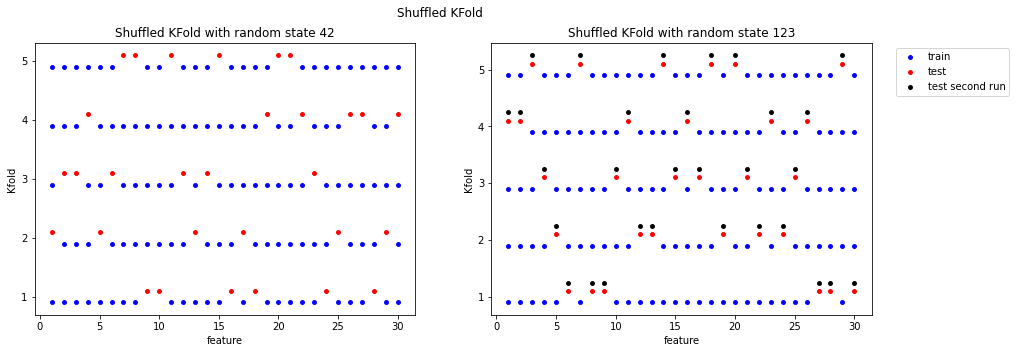

In [ ]:
train42, test42 = kfoldize(kf42,rn)
train123, test123 = kfoldize(kf123,rn)
train123_2, test123_2 = kfoldize(kf123,rn,shift=.25)

fig,ax = plt.subplots(1,2, figsize=(15,5))
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train42) 
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test42)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train123)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test123)
ax[1].scatter(x="x",y="val",c="k",label="test second run",s=15,data=test123_2)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[0].set_title("Shuffled KFold with random state 42")
ax[1].set_ylabel("Kfold")
ax[1].set_xlabel("feature")
ax[1].set_title("Shuffled KFold with random state 123")
plt.suptitle("Shuffled KFold")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact#, interact_manual

from pandas import read_csv
import matplotlib.pyplot as plt
from numpy import linspace, argmin
from scipy.stats import uniform

%matplotlib inline

## Pre-processing functions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Metricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve

## Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## Cross-Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, LeaveOneOut, RepeatedKFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit

## Search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
## Cargar data
dataClassification = read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv')
coefNameIndep = dataClassification.columns[:-1]
print('Data Classification')
dataClassification.head(5)

Data Classification


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
## Imprimir el numero de registros en cada clase
dataClassification['Classification'].value_counts(ascending=True)

1    52
2    64
Name: Classification, dtype: int64

In [ ]:
# Preprosesamiento
## Extraemos los datos sin la columna del target (etiquetas)
X = dataClassification.drop(columns=['Classification'])

## Extraemos la columna del target (etiquetas)
y = dataClassification['Classification']

## Particion de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Estandarizamos los datos
scale = StandardScaler().fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
## Instancias de los metodos de Cross-validation
CVs = {'KFold': KFold(n_splits=5, shuffle=True, random_state=0), 
       'LeaveOneOut': LeaveOneOut(),
       'RepeatedKFold': RepeatedKFold(n_splits=5, n_repeats=2, random_state=0),
       'ShuffleSplit': ShuffleSplit(n_splits=5, train_size=0.7, random_state=0), 
       'StratifiedKFold': StratifiedKFold(n_splits=5, shuffle=True, random_state=0),
       'StratifiedShuffleSplit': StratifiedShuffleSplit(n_splits=5, train_size=0.7, random_state=0)}

In [ ]:
## Instancia del modelo
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()

models = [model1, model2, model3]

for model in models:
  print(model)

  ## Computamos los scores con cada metodo de Cross-validation
  for name in CVs.keys():
      
      ## Computo de los scores
      scores = cross_val_score(estimator=model, X=X_train, y=y_train, 
                              n_jobs=-1, cv=CVs[name])
      
      ## Imprimir la media y varianza de los scores
      print('CV: {:>23s}, Mean Scores: {:.4f}, Variance Scores:{:.4f}'.format(name, 
                                                                              scores.mean(), 
                                                                              scores.var()))

LogisticRegression()
CV:                   KFold, Mean Scores: 0.7137, Variance Scores:0.0083
CV:             LeaveOneOut, Mean Scores: 0.7126, Variance Scores:0.2048
CV:           RepeatedKFold, Mean Scores: 0.7075, Variance Scores:0.0092
CV:            ShuffleSplit, Mean Scores: 0.6889, Variance Scores:0.0036
CV:         StratifiedKFold, Mean Scores: 0.7020, Variance Scores:0.0108
CV:  StratifiedShuffleSplit, Mean Scores: 0.7259, Variance Scores:0.0042
DecisionTreeClassifier()
CV:                   KFold, Mean Scores: 0.7379, Variance Scores:0.0098
CV:             LeaveOneOut, Mean Scores: 0.6207, Variance Scores:0.2354
CV:           RepeatedKFold, Mean Scores: 0.6673, Variance Scores:0.0109
CV:            ShuffleSplit, Mean Scores: 0.6296, Variance Scores:0.0005
CV:         StratifiedKFold, Mean Scores: 0.6549, Variance Scores:0.0056
CV:  StratifiedShuffleSplit, Mean Scores: 0.6593, Variance Scores:0.0041
RandomForestClassifier()
CV:                   KFold, Mean Scores: 0.6922, Var

In [ ]:
import time
# Model selection + Grid Search CV

cv =  StratifiedShuffleSplit(n_splits=10, train_size=0.7)

# Parametros de búsqueda

param = {'criterion': ['gini', 'entropy'],
        'min_samples_split': np.arange(2, 75),
        'max_depth': np.arange(1, 15)
       }

GridSCV = GridSearchCV(estimator=RandomForestClassifier(), 
                  cv=cv, n_jobs=-1, 
                  param_grid=param,
                  scoring='roc_auc').fit(X=X_train, y=y_train)

## Display best model's hyperparameters
print('Best hyperparameters: {}'.format(GridSCV.best_params_))

timeUp = time()-start
print('Time spent: {:.2f} seconds'.format(timeUp))

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 11}


TypeError: ignored